In [139]:
import pandas as pd
import numpy as np
import altair as alt

In [140]:
google_data = pd.read_csv("google-patent-data.csv")
google_data.head()

,id,title,grant date,result link,representative figure link
0,US-PP36186-P2,Interspecific prunus tree named ‘Sweet Pixie 6’,2024-10-08,https://patents.google.com/patent/USPP36186P2/en,https://patentimages.storage.googleapis.com/45...
1,US-PP35196-P2,Interspecific tree named ‘Lavish Lacey’,2023-05-30,https://patents.google.com/patent/USPP35196P2/en,https://patentimages.storage.googleapis.com/34...
2,US-PP35178-P2,Interspecific prunus tree named ‘FLAVOR FIESTA’,2023-05-23,https://patents.google.com/patent/USPP35178P2/en,https://patentimages.storage.googleapis.com/51...
3,US-PP34290-P2,Interspecific Prunus tree named ‘Flavor Kist’,2022-06-07,https://patents.google.com/patent/USPP34290P2/en,https://patentimages.storage.googleapis.com/9d...
4,US-PP34426-P2,Interspecific Prunus tree named ‘Flavor May’,2022-07-19,https://patents.google.com/patent/USPP34426P2/en,https://patentimages.storage.googleapis.com/9e...


In [141]:
scraped_data = pd.read_csv("scraped_patents.csv")
scraped_data.head()

,url,flesh.brix_text,flesh.brix_value,flesh.color,flesh.munsell,flesh.hex,flesh.rhs,skin.color,skin.munsell,skin.hex,skin.rhs
0,https://patents.google.com/patent/USPP36186P2/en,"Brix .—Average Brix 26.9°, varies slightly wit...",26.9,Color .—Varies from 2.5Y 8/10 to 5Y 8/8.,"['2.5Y 8/10', '5Y 8/8']","['#f5c342', '#e4c959']",[],Color .—Ground color varies from 7.5Y 8/6 to 1...,"['7.5Y 8/6', '10Y 8/4', '5R 2/4', '7.5R 3/8']","['#d8cc75', '#d0cd91', '#4d252a', '#812a27']",[]
1,https://patents.google.com/patent/USPP35196P2/en,"Brix .—Average Brix 16.5°, varies slightly wit...",16.5,Color .—Varies from 5R 3/8 to 5R 3/6.,"['5R 3/8', '5R 3/6']","['#812930', '#753336']",[],Color .—Ground color varies from 2.5Y 8.5/4 to...,"['5Y 8/4', '5R 3/6', '7.5R 3/6']","['#d8ca92', '#753336', '#75342f']",[]
2,https://patents.google.com/patent/USPP35178P2/en,"Brix .—Average Brix 19.0°, varies slightly wit...",19.0,Color .—Varies from 2.5R 4/10 to 5R 4/10.,"['2.5R 4/10', '5R 4/10']","['#a73b4d', '#a83c40']",[],Color .—Ground color varies from 2.5Y 8.5/6 to...,"['2.5Y 8/6', '2.5R 3/6', '5R 2/6']","['#e7c67b', '#75333c', '#581d28']",[]
3,https://patents.google.com/patent/USPP34290P2/en,"Brix.— Average Brix 25.0°, varies slightly wit...",25.0,Color.— Varies from 5R 4/8 to 2.5Y 8.5/4.,['5R 4/8'],['#9d4546'],[],Color.— Ground color varies from 7.5Y 8/4 to 7...,"['7.5Y 8/4', '7.5Y 7/4', '5R 3/4', '7.5R 3/4']","['#d4cb91', '#b9b078', '#6a3b3b', '#6a3b37']",[]
4,https://patents.google.com/patent/USPP34426P2/en,"Brix .—Average Brix 16.0°, varies slightly wit...",16.0,Color .—Varies from 7.5R 3/12 to 7.5R 2/8.,"['7.5R 3/12', '7.5R 2/8']","[None, '#62101c']",[],Color .—Ground color varies from 7.5Y 8.5/10 t...,"['7.5Y 8/6', '7.5R 3/10', '7.5R 2/8']","['#d8cc75', '#8b1d1e', '#62101c']",[]


In [142]:
google_data.shape

(100, 5)

In [143]:
scraped_data.shape

(100, 11)

In [144]:
patents = pd.merge(google_data, scraped_data, left_on='result link', right_on='url')
patents.head()

,id,title,grant date,result link,representative figure link,url,flesh.brix_text,flesh.brix_value,flesh.color,flesh.munsell,flesh.hex,flesh.rhs,skin.color,skin.munsell,skin.hex,skin.rhs
0,US-PP36186-P2,Interspecific prunus tree named ‘Sweet Pixie 6’,2024-10-08,https://patents.google.com/patent/USPP36186P2/en,https://patentimages.storage.googleapis.com/45...,https://patents.google.com/patent/USPP36186P2/en,"Brix .—Average Brix 26.9°, varies slightly wit...",26.9,Color .—Varies from 2.5Y 8/10 to 5Y 8/8.,"['2.5Y 8/10', '5Y 8/8']","['#f5c342', '#e4c959']",[],Color .—Ground color varies from 7.5Y 8/6 to 1...,"['7.5Y 8/6', '10Y 8/4', '5R 2/4', '7.5R 3/8']","['#d8cc75', '#d0cd91', '#4d252a', '#812a27']",[]
1,US-PP35196-P2,Interspecific tree named ‘Lavish Lacey’,2023-05-30,https://patents.google.com/patent/USPP35196P2/en,https://patentimages.storage.googleapis.com/34...,https://patents.google.com/patent/USPP35196P2/en,"Brix .—Average Brix 16.5°, varies slightly wit...",16.5,Color .—Varies from 5R 3/8 to 5R 3/6.,"['5R 3/8', '5R 3/6']","['#812930', '#753336']",[],Color .—Ground color varies from 2.5Y 8.5/4 to...,"['5Y 8/4', '5R 3/6', '7.5R 3/6']","['#d8ca92', '#753336', '#75342f']",[]
2,US-PP35178-P2,Interspecific prunus tree named ‘FLAVOR FIESTA’,2023-05-23,https://patents.google.com/patent/USPP35178P2/en,https://patentimages.storage.googleapis.com/51...,https://patents.google.com/patent/USPP35178P2/en,"Brix .—Average Brix 19.0°, varies slightly wit...",19.0,Color .—Varies from 2.5R 4/10 to 5R 4/10.,"['2.5R 4/10', '5R 4/10']","['#a73b4d', '#a83c40']",[],Color .—Ground color varies from 2.5Y 8.5/6 to...,"['2.5Y 8/6', '2.5R 3/6', '5R 2/6']","['#e7c67b', '#75333c', '#581d28']",[]
3,US-PP34290-P2,Interspecific Prunus tree named ‘Flavor Kist’,2022-06-07,https://patents.google.com/patent/USPP34290P2/en,https://patentimages.storage.googleapis.com/9d...,https://patents.google.com/patent/USPP34290P2/en,"Brix.— Average Brix 25.0°, varies slightly wit...",25.0,Color.— Varies from 5R 4/8 to 2.5Y 8.5/4.,['5R 4/8'],['#9d4546'],[],Color.— Ground color varies from 7.5Y 8/4 to 7...,"['7.5Y 8/4', '7.5Y 7/4', '5R 3/4', '7.5R 3/4']","['#d4cb91', '#b9b078', '#6a3b3b', '#6a3b37']",[]
4,US-PP34426-P2,Interspecific Prunus tree named ‘Flavor May’,2022-07-19,https://patents.google.com/patent/USPP34426P2/en,https://patentimages.storage.googleapis.com/9e...,https://patents.google.com/patent/USPP34426P2/en,"Brix .—Average Brix 16.0°, varies slightly wit...",16.0,Color .—Varies from 7.5R 3/12 to 7.5R 2/8.,"['7.5R 3/12', '7.5R 2/8']","[None, '#62101c']",[],Color .—Ground color varies from 7.5Y 8.5/10 t...,"['7.5Y 8/6', '7.5R 3/10', '7.5R 2/8']","['#d8cc75', '#8b1d1e', '#62101c']",[]


In [145]:
patents_cleaned = patents.drop(columns=['id','result link', 'representative figure link', 'flesh.brix_text'])
patents_cleaned.head()

,title,grant date,url,flesh.brix_value,flesh.color,flesh.munsell,flesh.hex,flesh.rhs,skin.color,skin.munsell,skin.hex,skin.rhs
0,Interspecific prunus tree named ‘Sweet Pixie 6’,2024-10-08,https://patents.google.com/patent/USPP36186P2/en,26.9,Color .—Varies from 2.5Y 8/10 to 5Y 8/8.,"['2.5Y 8/10', '5Y 8/8']","['#f5c342', '#e4c959']",[],Color .—Ground color varies from 7.5Y 8/6 to 1...,"['7.5Y 8/6', '10Y 8/4', '5R 2/4', '7.5R 3/8']","['#d8cc75', '#d0cd91', '#4d252a', '#812a27']",[]
1,Interspecific tree named ‘Lavish Lacey’,2023-05-30,https://patents.google.com/patent/USPP35196P2/en,16.5,Color .—Varies from 5R 3/8 to 5R 3/6.,"['5R 3/8', '5R 3/6']","['#812930', '#753336']",[],Color .—Ground color varies from 2.5Y 8.5/4 to...,"['5Y 8/4', '5R 3/6', '7.5R 3/6']","['#d8ca92', '#753336', '#75342f']",[]
2,Interspecific prunus tree named ‘FLAVOR FIESTA’,2023-05-23,https://patents.google.com/patent/USPP35178P2/en,19.0,Color .—Varies from 2.5R 4/10 to 5R 4/10.,"['2.5R 4/10', '5R 4/10']","['#a73b4d', '#a83c40']",[],Color .—Ground color varies from 2.5Y 8.5/6 to...,"['2.5Y 8/6', '2.5R 3/6', '5R 2/6']","['#e7c67b', '#75333c', '#581d28']",[]
3,Interspecific Prunus tree named ‘Flavor Kist’,2022-06-07,https://patents.google.com/patent/USPP34290P2/en,25.0,Color.— Varies from 5R 4/8 to 2.5Y 8.5/4.,['5R 4/8'],['#9d4546'],[],Color.— Ground color varies from 7.5Y 8/4 to 7...,"['7.5Y 8/4', '7.5Y 7/4', '5R 3/4', '7.5R 3/4']","['#d4cb91', '#b9b078', '#6a3b3b', '#6a3b37']",[]
4,Interspecific Prunus tree named ‘Flavor May’,2022-07-19,https://patents.google.com/patent/USPP34426P2/en,16.0,Color .—Varies from 7.5R 3/12 to 7.5R 2/8.,"['7.5R 3/12', '7.5R 2/8']","[None, '#62101c']",[],Color .—Ground color varies from 7.5Y 8.5/10 t...,"['7.5Y 8/6', '7.5R 3/10', '7.5R 2/8']","['#d8cc75', '#8b1d1e', '#62101c']",[]


In [146]:
patents_cleaned.dtypes

title                object
grant date           object
url                  object
flesh.brix_value    float64
flesh.color          object
flesh.munsell        object
flesh.hex            object
flesh.rhs            object
skin.color           object
skin.munsell         object
skin.hex             object
skin.rhs             object
dtype: object

In [147]:
patents_cleaned['grant date'] = pd.to_datetime(patents_cleaned['grant date'])

patents_cleaned['grant year'] = patents_cleaned['grant date'].dt.year

patents_cleaned.head()

,title,grant date,url,flesh.brix_value,flesh.color,flesh.munsell,flesh.hex,flesh.rhs,skin.color,skin.munsell,skin.hex,skin.rhs,grant year
0,Interspecific prunus tree named ‘Sweet Pixie 6’,2024-10-08,https://patents.google.com/patent/USPP36186P2/en,26.9,Color .—Varies from 2.5Y 8/10 to 5Y 8/8.,"['2.5Y 8/10', '5Y 8/8']","['#f5c342', '#e4c959']",[],Color .—Ground color varies from 7.5Y 8/6 to 1...,"['7.5Y 8/6', '10Y 8/4', '5R 2/4', '7.5R 3/8']","['#d8cc75', '#d0cd91', '#4d252a', '#812a27']",[],2024
1,Interspecific tree named ‘Lavish Lacey’,2023-05-30,https://patents.google.com/patent/USPP35196P2/en,16.5,Color .—Varies from 5R 3/8 to 5R 3/6.,"['5R 3/8', '5R 3/6']","['#812930', '#753336']",[],Color .—Ground color varies from 2.5Y 8.5/4 to...,"['5Y 8/4', '5R 3/6', '7.5R 3/6']","['#d8ca92', '#753336', '#75342f']",[],2023
2,Interspecific prunus tree named ‘FLAVOR FIESTA’,2023-05-23,https://patents.google.com/patent/USPP35178P2/en,19.0,Color .—Varies from 2.5R 4/10 to 5R 4/10.,"['2.5R 4/10', '5R 4/10']","['#a73b4d', '#a83c40']",[],Color .—Ground color varies from 2.5Y 8.5/6 to...,"['2.5Y 8/6', '2.5R 3/6', '5R 2/6']","['#e7c67b', '#75333c', '#581d28']",[],2023
3,Interspecific Prunus tree named ‘Flavor Kist’,2022-06-07,https://patents.google.com/patent/USPP34290P2/en,25.0,Color.— Varies from 5R 4/8 to 2.5Y 8.5/4.,['5R 4/8'],['#9d4546'],[],Color.— Ground color varies from 7.5Y 8/4 to 7...,"['7.5Y 8/4', '7.5Y 7/4', '5R 3/4', '7.5R 3/4']","['#d4cb91', '#b9b078', '#6a3b3b', '#6a3b37']",[],2022
4,Interspecific Prunus tree named ‘Flavor May’,2022-07-19,https://patents.google.com/patent/USPP34426P2/en,16.0,Color .—Varies from 7.5R 3/12 to 7.5R 2/8.,"['7.5R 3/12', '7.5R 2/8']","[None, '#62101c']",[],Color .—Ground color varies from 7.5Y 8.5/10 t...,"['7.5Y 8/6', '7.5R 3/10', '7.5R 2/8']","['#d8cc75', '#8b1d1e', '#62101c']",[],2022


In [148]:
year_column = patents_cleaned.pop('grant year')

In [149]:
patents_cleaned.insert(1, 'year', year_column)

In [150]:
patents_cleaned.head()

,title,year,grant date,url,flesh.brix_value,flesh.color,flesh.munsell,flesh.hex,flesh.rhs,skin.color,skin.munsell,skin.hex,skin.rhs
0,Interspecific prunus tree named ‘Sweet Pixie 6’,2024,2024-10-08,https://patents.google.com/patent/USPP36186P2/en,26.9,Color .—Varies from 2.5Y 8/10 to 5Y 8/8.,"['2.5Y 8/10', '5Y 8/8']","['#f5c342', '#e4c959']",[],Color .—Ground color varies from 7.5Y 8/6 to 1...,"['7.5Y 8/6', '10Y 8/4', '5R 2/4', '7.5R 3/8']","['#d8cc75', '#d0cd91', '#4d252a', '#812a27']",[]
1,Interspecific tree named ‘Lavish Lacey’,2023,2023-05-30,https://patents.google.com/patent/USPP35196P2/en,16.5,Color .—Varies from 5R 3/8 to 5R 3/6.,"['5R 3/8', '5R 3/6']","['#812930', '#753336']",[],Color .—Ground color varies from 2.5Y 8.5/4 to...,"['5Y 8/4', '5R 3/6', '7.5R 3/6']","['#d8ca92', '#753336', '#75342f']",[]
2,Interspecific prunus tree named ‘FLAVOR FIESTA’,2023,2023-05-23,https://patents.google.com/patent/USPP35178P2/en,19.0,Color .—Varies from 2.5R 4/10 to 5R 4/10.,"['2.5R 4/10', '5R 4/10']","['#a73b4d', '#a83c40']",[],Color .—Ground color varies from 2.5Y 8.5/6 to...,"['2.5Y 8/6', '2.5R 3/6', '5R 2/6']","['#e7c67b', '#75333c', '#581d28']",[]
3,Interspecific Prunus tree named ‘Flavor Kist’,2022,2022-06-07,https://patents.google.com/patent/USPP34290P2/en,25.0,Color.— Varies from 5R 4/8 to 2.5Y 8.5/4.,['5R 4/8'],['#9d4546'],[],Color.— Ground color varies from 7.5Y 8/4 to 7...,"['7.5Y 8/4', '7.5Y 7/4', '5R 3/4', '7.5R 3/4']","['#d4cb91', '#b9b078', '#6a3b3b', '#6a3b37']",[]
4,Interspecific Prunus tree named ‘Flavor May’,2022,2022-07-19,https://patents.google.com/patent/USPP34426P2/en,16.0,Color .—Varies from 7.5R 3/12 to 7.5R 2/8.,"['7.5R 3/12', '7.5R 2/8']","[None, '#62101c']",[],Color .—Ground color varies from 7.5Y 8.5/10 t...,"['7.5Y 8/6', '7.5R 3/10', '7.5R 2/8']","['#d8cc75', '#8b1d1e', '#62101c']",[]


In [151]:
patents_cleaned['pluot name'] = patents_cleaned['title'].str.extract(r'[\'"`“”‘’](.*?)[\'"`“”‘’]', expand=False)

In [152]:
patents_cleaned.head()

,title,year,grant date,url,flesh.brix_value,flesh.color,flesh.munsell,flesh.hex,flesh.rhs,skin.color,skin.munsell,skin.hex,skin.rhs,pluot name
0,Interspecific prunus tree named ‘Sweet Pixie 6’,2024,2024-10-08,https://patents.google.com/patent/USPP36186P2/en,26.9,Color .—Varies from 2.5Y 8/10 to 5Y 8/8.,"['2.5Y 8/10', '5Y 8/8']","['#f5c342', '#e4c959']",[],Color .—Ground color varies from 7.5Y 8/6 to 1...,"['7.5Y 8/6', '10Y 8/4', '5R 2/4', '7.5R 3/8']","['#d8cc75', '#d0cd91', '#4d252a', '#812a27']",[],Sweet Pixie 6
1,Interspecific tree named ‘Lavish Lacey’,2023,2023-05-30,https://patents.google.com/patent/USPP35196P2/en,16.5,Color .—Varies from 5R 3/8 to 5R 3/6.,"['5R 3/8', '5R 3/6']","['#812930', '#753336']",[],Color .—Ground color varies from 2.5Y 8.5/4 to...,"['5Y 8/4', '5R 3/6', '7.5R 3/6']","['#d8ca92', '#753336', '#75342f']",[],Lavish Lacey
2,Interspecific prunus tree named ‘FLAVOR FIESTA’,2023,2023-05-23,https://patents.google.com/patent/USPP35178P2/en,19.0,Color .—Varies from 2.5R 4/10 to 5R 4/10.,"['2.5R 4/10', '5R 4/10']","['#a73b4d', '#a83c40']",[],Color .—Ground color varies from 2.5Y 8.5/6 to...,"['2.5Y 8/6', '2.5R 3/6', '5R 2/6']","['#e7c67b', '#75333c', '#581d28']",[],FLAVOR FIESTA
3,Interspecific Prunus tree named ‘Flavor Kist’,2022,2022-06-07,https://patents.google.com/patent/USPP34290P2/en,25.0,Color.— Varies from 5R 4/8 to 2.5Y 8.5/4.,['5R 4/8'],['#9d4546'],[],Color.— Ground color varies from 7.5Y 8/4 to 7...,"['7.5Y 8/4', '7.5Y 7/4', '5R 3/4', '7.5R 3/4']","['#d4cb91', '#b9b078', '#6a3b3b', '#6a3b37']",[],Flavor Kist
4,Interspecific Prunus tree named ‘Flavor May’,2022,2022-07-19,https://patents.google.com/patent/USPP34426P2/en,16.0,Color .—Varies from 7.5R 3/12 to 7.5R 2/8.,"['7.5R 3/12', '7.5R 2/8']","[None, '#62101c']",[],Color .—Ground color varies from 7.5Y 8.5/10 t...,"['7.5Y 8/6', '7.5R 3/10', '7.5R 2/8']","['#d8cc75', '#8b1d1e', '#62101c']",[],Flavor May


In [153]:
patents_cleaned['pluot name'] = patents_cleaned['pluot name'].str.title()

In [154]:
patents_cleaned['pluot name'].to_string(index=False)

' Sweet Pixie 6\n  Lavish Lacey\n Flavor Fiesta\n   Flavor Kist\n    Flavor May\n    Flavor Joy\n  Flavor Belle\n       Alm-754\n Sangria Red-2\n   Sangria Red\n Flavorzee-517\n Flavorzee-290\n   Ebony Punch\nSunset Plapple\n        Sherri\n  Sweet Kashel\n   Flavor Mist\n       Hermosa\n    Rich Magic\n      Seacliff\n  Autumn Charm\n    Bella Jean\n      Carlsbad\n     Kings Kat\n  Autumn Magic\n       Redondo\n     Amigo Iii\n        Malibu\n   Polar Pride\n  Autumn Fritz\n     Amber Glo\n     Newroot-3\nCrimson Carson\n  Crimson Rose\n   Bella Sweet\n        Laguna\n     Newroot-2\n    Ebony Rose\n     Bella Kat\nSunset Delight\n  Flavor Blast\n     Glory Red\n        Kylese\n   Bella Jewel\n Flavor Fusion\n   Country Cot\n   Black Satin\n     Betty-Cot\n   Crimson Kat\n   Fall Fiesta\n    Bella Rose\n     Bella Sun\n     Newroot-1\n      Leah Cot\n        Alm-21\n  Bella Royale\n        Gypzee\n      Ruby Kat\n      Coparose\n    Royal Edie\n   Honey Punch\n Late Brittney\n     Co

In [155]:
name_column = patents_cleaned.pop('pluot name')

In [156]:
patents_cleaned.insert(1, 'pluot name', name_column)

In [157]:
patents_cleaned.head()

,title,pluot name,year,grant date,url,flesh.brix_value,flesh.color,flesh.munsell,flesh.hex,flesh.rhs,skin.color,skin.munsell,skin.hex,skin.rhs
0,Interspecific prunus tree named ‘Sweet Pixie 6’,Sweet Pixie 6,2024,2024-10-08,https://patents.google.com/patent/USPP36186P2/en,26.9,Color .—Varies from 2.5Y 8/10 to 5Y 8/8.,"['2.5Y 8/10', '5Y 8/8']","['#f5c342', '#e4c959']",[],Color .—Ground color varies from 7.5Y 8/6 to 1...,"['7.5Y 8/6', '10Y 8/4', '5R 2/4', '7.5R 3/8']","['#d8cc75', '#d0cd91', '#4d252a', '#812a27']",[]
1,Interspecific tree named ‘Lavish Lacey’,Lavish Lacey,2023,2023-05-30,https://patents.google.com/patent/USPP35196P2/en,16.5,Color .—Varies from 5R 3/8 to 5R 3/6.,"['5R 3/8', '5R 3/6']","['#812930', '#753336']",[],Color .—Ground color varies from 2.5Y 8.5/4 to...,"['5Y 8/4', '5R 3/6', '7.5R 3/6']","['#d8ca92', '#753336', '#75342f']",[]
2,Interspecific prunus tree named ‘FLAVOR FIESTA’,Flavor Fiesta,2023,2023-05-23,https://patents.google.com/patent/USPP35178P2/en,19.0,Color .—Varies from 2.5R 4/10 to 5R 4/10.,"['2.5R 4/10', '5R 4/10']","['#a73b4d', '#a83c40']",[],Color .—Ground color varies from 2.5Y 8.5/6 to...,"['2.5Y 8/6', '2.5R 3/6', '5R 2/6']","['#e7c67b', '#75333c', '#581d28']",[]
3,Interspecific Prunus tree named ‘Flavor Kist’,Flavor Kist,2022,2022-06-07,https://patents.google.com/patent/USPP34290P2/en,25.0,Color.— Varies from 5R 4/8 to 2.5Y 8.5/4.,['5R 4/8'],['#9d4546'],[],Color.— Ground color varies from 7.5Y 8/4 to 7...,"['7.5Y 8/4', '7.5Y 7/4', '5R 3/4', '7.5R 3/4']","['#d4cb91', '#b9b078', '#6a3b3b', '#6a3b37']",[]
4,Interspecific Prunus tree named ‘Flavor May’,Flavor May,2022,2022-07-19,https://patents.google.com/patent/USPP34426P2/en,16.0,Color .—Varies from 7.5R 3/12 to 7.5R 2/8.,"['7.5R 3/12', '7.5R 2/8']","[None, '#62101c']",[],Color .—Ground color varies from 7.5Y 8.5/10 t...,"['7.5Y 8/6', '7.5R 3/10', '7.5R 2/8']","['#d8cc75', '#8b1d1e', '#62101c']",[]


In [158]:
patents_cleaned.to_csv('patents_cleaned.csv', index=False)

In [159]:
handpicked = pd.read_csv("handpicked-data.csv")
handpicked.head()

,Varietal,Average Brix (deg),Patent issued,Farmer’s market favorite?,Packing variety?,Skin color,Flesh color,Estimated chilling requirement (h),Interesting characteristics,Best taste test score (1-9),Average overall score for years it scored 6.0+,Flavor average score (0-5),Harvest time
0,Amigo 1,16,NaN,NaN,y,blue-red,red-tinged yellow,700,"plum-like, most tart pluot",NaN,NaN,NaN,NaN
1,Amigo 2,18,NaN,NaN,NaN,red,orange,750-800,NaN,NaN,NaN,NaN,NaN
2,Black Kat,20,NaN,y,y,dark (black?),NaN,1000,NaN,NaN,NaN,NaN,NaN
3,Candy Stripe,16.3 (then sweetens),NaN,y,NaN,pink-yellow striped,NaN,800,sweetens dramatically if left on tree for 3 weeks,NaN,NaN,NaN,NaN
4,Coparose,15,NaN,NaN,NaN,yellow to red,golden,600,NaN,NaN,NaN,NaN,NaN


In [160]:
pluots_all = pd.merge(patents_cleaned, handpicked, left_on='pluot name', right_on='Varietal', how='outer')
pluots_all.head()

,title,pluot name,year,grant date,url,flesh.brix_value,flesh.color,flesh.munsell,flesh.hex,flesh.rhs,...,Farmer’s market favorite?,Packing variety?,Skin color,Flesh color,Estimated chilling requirement (h),Interesting characteristics,Best taste test score (1-9),Average overall score for years it scored 6.0+,Flavor average score (0-5),Harvest time
0,Interspecific almond tree named ‘Alm-21’,Alm-21,2009.0,2009-09-15,https://patents.google.com/patent/USPP20295P2/en,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Interspecfic almond tree named ‘ALM-754’,Alm-754,2021.0,2021-11-09,https://patents.google.com/patent/USPP33622P2/en,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Interspecific tree named ‘AMBER GLO’,Amber Glo,2015.0,2015-12-15,https://patents.google.com/patent/USPP26203P3/en,18.0,Color.— Varies from 10YR 7/10 to,['10YR 7/10'],['#e2a433'],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,y,blue-red,red-tinged yellow,700,"plum-like, most tart pluot",NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,red,orange,750-800,NaN,NaN,NaN,NaN,NaN


In [161]:
pluots_all.shape

(113, 27)

In [162]:
pluots_all['pluot name'] = pluots_all['pluot name'].combine_first(pluots_all['Varietal'])

In [163]:
pluots_all.drop(columns='Varietal')

,title,pluot name,year,grant date,url,flesh.brix_value,flesh.color,flesh.munsell,flesh.hex,flesh.rhs,...,Farmer’s market favorite?,Packing variety?,Skin color,Flesh color,Estimated chilling requirement (h),Interesting characteristics,Best taste test score (1-9),Average overall score for years it scored 6.0+,Flavor average score (0-5),Harvest time
0,Interspecific almond tree named ‘Alm-21’,Alm-21,2009.0,2009-09-15,https://patents.google.com/patent/USPP20295P2/en,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Interspecfic almond tree named ‘ALM-754’,Alm-754,2021.0,2021-11-09,https://patents.google.com/patent/USPP33622P2/en,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Interspecific tree named ‘AMBER GLO’,Amber Glo,2015.0,2015-12-15,https://patents.google.com/patent/USPP26203P3/en,18.0,Color.— Varies from 10YR 7/10 to,['10YR 7/10'],['#e2a433'],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Amigo 1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,y,blue-red,red-tinged yellow,700,"plum-like, most tart pluot",NaN,NaN,NaN,NaN
4,NaN,Amigo 2,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,red,orange,750-800,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Interspecific tree named ‘Yuba Gold’,Yuba Gold,2003.0,2003-01-28,https://patents.google.com/patent/USPP13526P2/en,NaN,Color.— 10YR 8/8. Pit cavity 10YR 7/10.,"['10YR 8/8', '10YR 7/10']","['#f8c168', '#e2a433']",[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,Interspecific tree,NaN,2006.0,2006-04-04,https://patents.google.com/patent/USPP16412P2/en,14.9,Color.— Varies from 7.5R 4/10 to 5R 4/10. Pit ...,"['7.5R 4/10', '5R 4/10', '5R 3/8', '5R 4/6']","['#a83d34', '#a83c40', '#812930', '#904e4c']",[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,Interspecific tree,NaN,2006.0,2006-04-04,https://patents.google.com/patent/USPP16413P2/en,17.7,Colors.—,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,Interspecific tree named: Marcia's Flavor,NaN,2004.0,2004-08-17,https://patents.google.com/patent/USPP15088P3/en,19.2,"Color.— Varies from 5Y 8.5/6 to 2.5Y 5/10, wit...","['2.5Y 5/10', '2.5YR 6/6', '2.5YR 6/8']","[None, '#c58667', '#d18157']",[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
pluots_all.head()

,title,pluot name,year,grant date,url,flesh.brix_value,flesh.color,flesh.munsell,flesh.hex,flesh.rhs,...,Farmer’s market favorite?,Packing variety?,Skin color,Flesh color,Estimated chilling requirement (h),Interesting characteristics,Best taste test score (1-9),Average overall score for years it scored 6.0+,Flavor average score (0-5),Harvest time
0,Interspecific almond tree named ‘Alm-21’,Alm-21,2009.0,2009-09-15,https://patents.google.com/patent/USPP20295P2/en,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Interspecfic almond tree named ‘ALM-754’,Alm-754,2021.0,2021-11-09,https://patents.google.com/patent/USPP33622P2/en,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Interspecific tree named ‘AMBER GLO’,Amber Glo,2015.0,2015-12-15,https://patents.google.com/patent/USPP26203P3/en,18.0,Color.— Varies from 10YR 7/10 to,['10YR 7/10'],['#e2a433'],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Amigo 1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,y,blue-red,red-tinged yellow,700,"plum-like, most tart pluot",NaN,NaN,NaN,NaN
4,NaN,Amigo 2,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,red,orange,750-800,NaN,NaN,NaN,NaN,NaN


In [165]:
pluots_all.to_csv("pluots_all.csv", index=False)

In [166]:
pluots_cleaned = pd.read_csv("pluots_cleaned.csv")
pluots_cleaned.head()

,title,pluot name,year,scraped_brix,Best taste test score (1-9),Average overall score for years it scored 6.0+,Flavor average score (0-5),Bottom 50% attractiveness,Farmer’s market fave,Packing variety,...,skin.color,skin.munsell,skin.hex,skin.rhs,handpicked_brix,Skin color,Flesh color,chill_hrs,notes,Harvest time
0,Interspecific tree named ‘AMBER GLO’,Amber Glo,2015,18.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Color.— Varies from 10YR 7/10 to 10YR 7/12.,"['10YR 7/10', '10YR 7/12']","['#e2a433', '#E6A000']",[],NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Amigo 1,2009,15.8,NaN,NaN,NaN,NaN,NaN,y,...,NaN,NaN,NaN,NaN,16,blue-red,red-tinged yellow,700,"plum-like, most tart pluot",NaN
2,Interspecific tree named ‘Amigo II’,Amigo 2,2007,17.6,NaN,NaN,NaN,NaN,NaN,NaN,...,Color.— Ground color varies from 5Y 7/6 to 7.5...,"['5Y 7/6', '7.5Y 8/8', '5R 3/6', '7.5R 2/6']","['#c4ae5e', '#dccc56', '#753336', '#581d21']",[],18,red,orange,750-800,NaN,NaN
3,Interspecific tree named ‘Amigo III’,Amigo 3,2016,17.6,NaN,NaN,NaN,NaN,NaN,NaN,...,Color .—Ground color varies from 5Y 6/6 to 7.5...,"['5Y 6/6', '7.5Y 8/6', '5R 4/6', '7.5R 3/6']","['#aa9345', '#d8cc75', '#904e4c', '#75342f']",[],NaN,NaN,NaN,NaN,NaN,NaN
4,Interspecific tree named ‘Autumn Charm’,Autumn Charm,2017,16.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Color .—Ground color varies from 7.5YR 7/10 to...,"['7.5YR 7/10', '5YR 7/10', '7.5R 4/12', '10R 3...","['#eb9f41', '#f39b4f', '#b2322b', '#7f2d1d']",[],NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
pluots_cleaned.dtypes

title                                              object
pluot name                                         object
year                                                int64
scraped_brix                                      float64
Best taste test score (1-9)                       float64
Average overall score for years it scored 6.0+    float64
Flavor average score (0-5)                        float64
Bottom 50% attractiveness                          object
Farmer’s market fave                               object
Packing variety                                    object
flesh.color                                        object
flesh.munsell                                      object
flesh.hex                                          object
flesh.rhs                                          object
skin.color                                         object
skin.munsell                                       object
skin.hex                                           object
skin.rhs      

In [168]:
pluots_cleaned['year'] = pluots_cleaned['year'].astype('Int64')

<Axes: xlabel='year'>

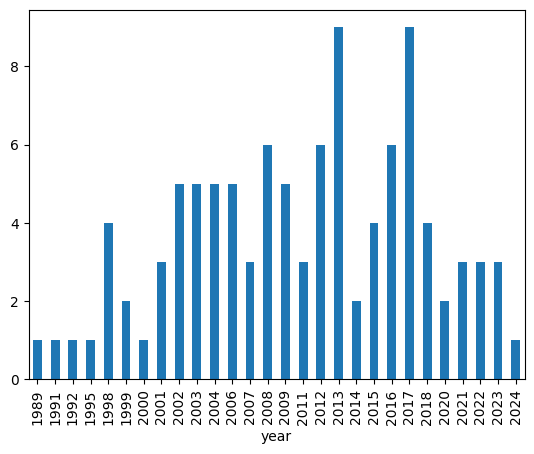

In [169]:
pluots_cleaned['year'].value_counts().sort_index().plot(kind='bar')

In [170]:
pluots_year_brix = pluots_cleaned[['pluot name', 'year', 'scraped_brix']]
pluots_year_brix.head()

,pluot name,year,scraped_brix
0,Amber Glo,2015,18.0
1,Amigo 1,2009,15.8
2,Amigo 2,2007,17.6
3,Amigo 3,2016,17.6
4,Autumn Charm,2017,16.0


<Axes: xlabel='year', ylabel='scraped_brix'>

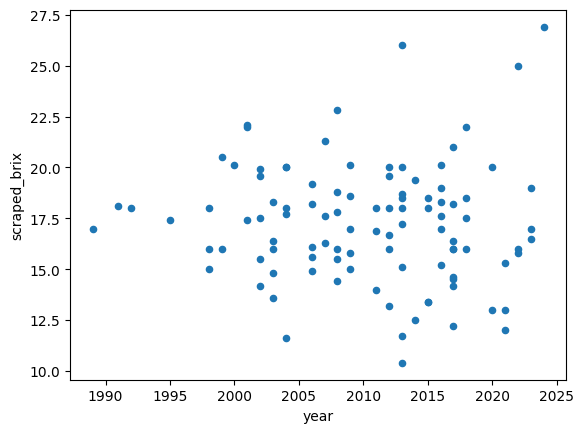

In [171]:
pluots_year_brix.plot.scatter(x='year', y='scraped_brix')

In [177]:
pluots_taste = pd.read_csv("pluot_taste_scores.csv")
pluots_taste.head()

,year,name,acid,sugar,flavor,overall
0,1993,Flavor Supreme,3.2,3.6,4.3,7.2
1,1994,Flavor Supreme,3.3,3.7,4.5,7.7
2,1995,Flavor King,3.1,3.9,4.4,8.1
3,1995,Dapple Dandy,3.5,3.6,4.3,7.3
4,1996,Dapple Dandy,3.2,3.9,4.5,7.9


In [179]:
pluots_taste.rename(columns={'name': 'pluot name'}, inplace=True)

<Axes: xlabel='acid', ylabel='flavor'>

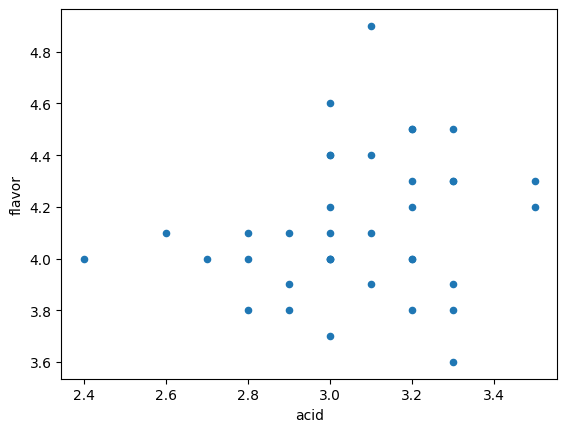

In [196]:
pluots_taste.plot(kind='scatter', x='acid', y='flavor')

<Axes: xlabel='sugar', ylabel='flavor'>

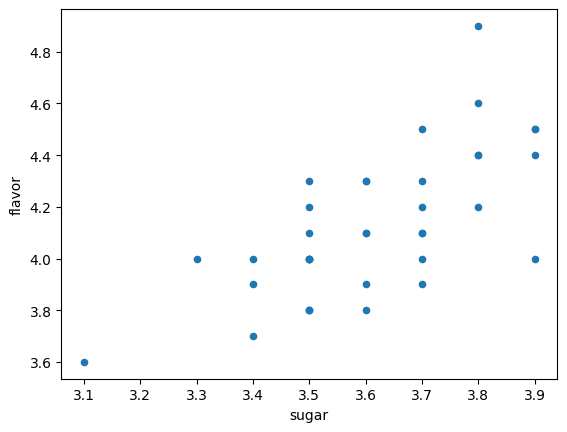

In [198]:
pluots_taste.plot(kind='scatter', x='sugar', y='flavor')

<Axes: xlabel='flavor', ylabel='overall'>

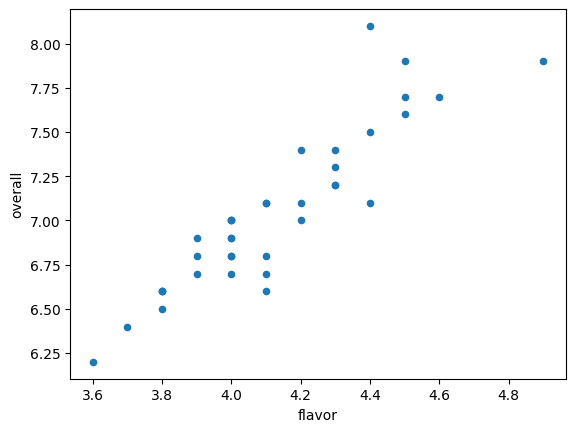

In [199]:
pluots_taste.plot(kind='scatter', x='flavor', y='overall')

In [181]:
pluots_taste_means = pluots_taste.groupby('pluot name')[['acid', 'sugar', 'flavor', 'overall']].mean()
pluots_taste_means.head()

,acid,sugar,flavor,overall
pluot name,,,,
Dapple Dandy,3.171429,3.542857,4.114286,7.057143
Emerald Drop,3.000000,3.600000,4.133333,6.966667
Flavor Finale,3.250000,3.550000,4.050000,6.850000
Flavor Grenade,2.900000,3.580000,3.980000,6.740000
Flavor King,3.150000,3.787500,4.387500,7.487500


In [204]:
pluots_taste_merged = pd.merge(pluots_taste_means, pluots_cleaned[['pluot name', 'scraped_brix']], how='left', on='pluot name')
pluots_taste_merged.head(10)

,pluot name,acid,sugar,flavor,overall,scraped_brix
0,Dapple Dandy,3.171429,3.542857,4.114286,7.057143,17.4
1,Emerald Drop,3.000000,3.600000,4.133333,6.966667,20.0
2,Flavor Finale,3.250000,3.550000,4.050000,6.850000,18.2
3,Flavor Grenade,2.900000,3.580000,3.980000,6.740000,22.0
4,Flavor King,3.150000,3.787500,4.387500,7.487500,18.0
5,Flavor Queen,2.633333,3.600000,3.933333,6.800000,18.1
6,Flavor Supreme,3.266667,3.666667,4.366667,7.433333,17.0
7,Geo Pride,2.950000,3.550000,3.800000,6.650000,18.0
8,Honey Punch,3.100000,3.600000,4.100000,7.100000,18.8
9,Splash,3.100000,3.433333,3.933333,6.700000,18.0


<Axes: xlabel='scraped_brix', ylabel='overall'>

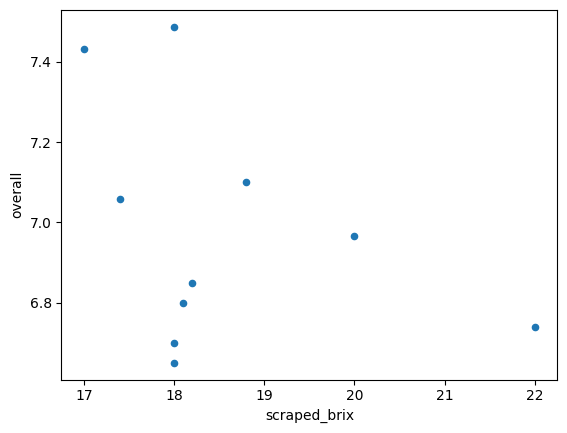

In [201]:
pluots_taste_merged.plot(kind='scatter', x='scraped_brix', y='overall')

<Axes: xlabel='sugar', ylabel='flavor'>

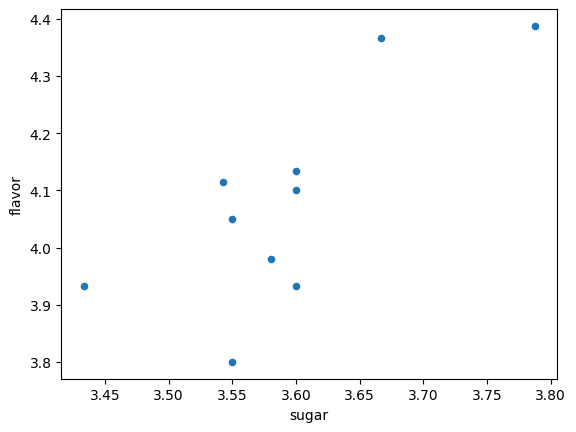

In [195]:
pluots_taste_merged.plot(kind='scatter', x='sugar', y='flavor')

# To look at pluot colors

In [208]:
import ast

# from pluots_cleaned skin.hex and flesh.hex

# Assuming the column with the hex lists is called 'colors'
def extract_hexes(val):
    try:
        parsed = ast.literal_eval(val)
        return [color for color in parsed if color is not None]
    except (ValueError, SyntaxError):
        return []

# Flatten the entire column into one list of hex values
all_skin_hexes = pluots_cleaned['skin.hex'].apply(extract_hexes).sum()
all_flesh_hexes = pluots_cleaned['flesh.hex'].apply(extract_hexes).sum()

In [207]:
all_skin_hexes

['#e2a433',
 '#E6A000',
 '#c4ae5e',
 '#dccc56',
 '#753336',
 '#581d21',
 '#aa9345',
 '#d8cc75',
 '#904e4c',
 '#75342f',
 '#eb9f41',
 '#f39b4f',
 '#b2322b',
 '#7f2d1d',
 '#c08b36',
 '#e2a433',
 '#812a27',
 '#8b1d1e',
 '#f1e4c7',
 '#fbe3ac',
 '#412b2f',
 '#422b2d',
 '#eb9f41',
 '#f39c1c',
 '#efc561',
 '#9c4550',
 '#8d182b',
 '#c08b36',
 '#ce8524',
 '#75342f',
 '#812a27',
 '#d0cd91',
 '#4d252a',
 '#e4c599',
 '#c0b13d',
 '#422b2d',
 '#422b2b',
 '#f5c342',
 '#FDBD4E',
 '#e27471',
 '#610e2e',
 '#dfecab',
 '#dfca76',
 '#75342f',
 '#812a27',
 '#f5c342',
 '#e4c959',
 '#a83d34',
 '#b2322b',
 '#eec382',
 '#4d252a',
 '#62101c',
 '#dc7b45',
 '#bf6029',
 '#a83c40',
 '#e4c959',
 '#422b2d',
 '#8b1d1e',
 '#a83d34',
 '#bc2120',
 '#e2a433',
 '#ce8524',
 '#b86619',
 '#d0cd91',
 '#d2ce74',
 '#8d182b',
 '#4d252a',
 '#dd7c14',
 '#9b4832',
 '#892210',
 '#b86619',
 '#f4e6a9',
 '#812930',
 '#4d252a',
 '#753336',
 '#4d252a',
 '#d8ca92',
 '#d0cbab',
 '#753336',
 '#fbe3ac',
 '#812930',
 '#62101c',
 '#d3a868',
 '#c

In [209]:
all_flesh_hexes

['#e2a433',
 '#dba650',
 '#b19049',
 '#dfc895',
 '#dfca76',
 '#eec382',
 '#dba650',
 '#cdab63',
 '#892210',
 '#efc561',
 '#d68034',
 '#dd7c14',
 '#e2a433',
 '#E6A000',
 '#b86619',
 '#ce8524',
 '#dba650',
 '#a83d34',
 '#812930',
 '#62101c',
 '#4d252a',
 '#8d182b',
 '#d2caac',
 '#f5c342',
 '#ec7042',
 '#d18157',
 '#b5663d',
 '#f5c342',
 '#e8c935',
 '#f5c342',
 '#cdad0e',
 '#f4e6a9',
 '#bf6029',
 '#d68034',
 '#bf6029',
 '#e4c959',
 '#d37f62',
 '#f8c168',
 '#dba650',
 '#efc561',
 '#c58910',
 '#f1e4c7',
 '#e19e99',
 '#cdab63',
 '#b19049',
 '#f39b4f',
 '#fc9633',
 '#8d182b',
 '#eee5c5',
 '#b22f3a',
 '#8d182b',
 '#4d252a',
 '#8d182b',
 '#812930',
 '#8b1d1e',
 '#fae58d',
 '#f0e7a8',
 '#cdab63',
 '#b19049',
 '#a83c40',
 '#e27471',
 '#b2322b',
 '#9d4546',
 '#812a27',
 '#8c1637',
 '#812739',
 '#f8c168',
 '#d3aa48',
 '#d9a822',
 '#eb9f41',
 '#e2a433',
 '#c58910',
 '#d4cf56',
 '#e7c67b',
 '#f5c342',
 '#aa6d26',
 '#c08b36',
 '#a73b4d',
 '#a83c40',
 '#735b5a',
 '#a83d34',
 '#812a27',
 '#8b1d1e',
 '#e

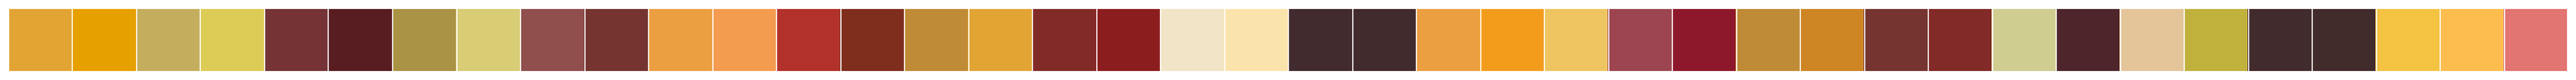

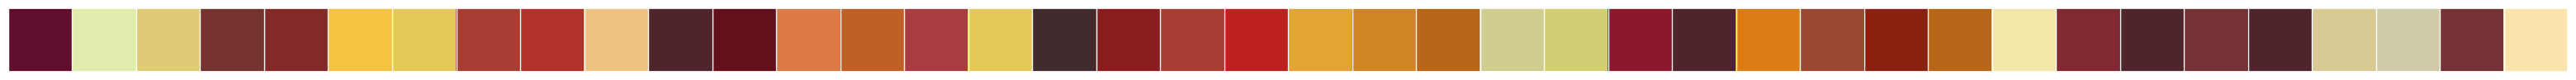

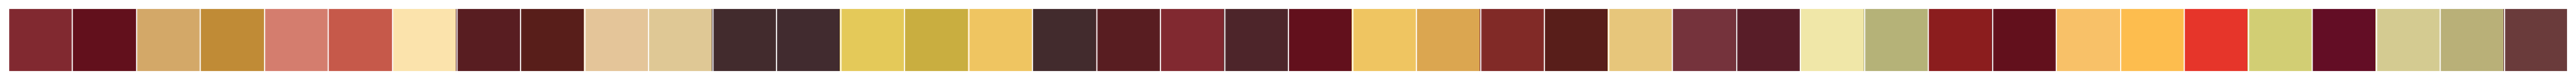

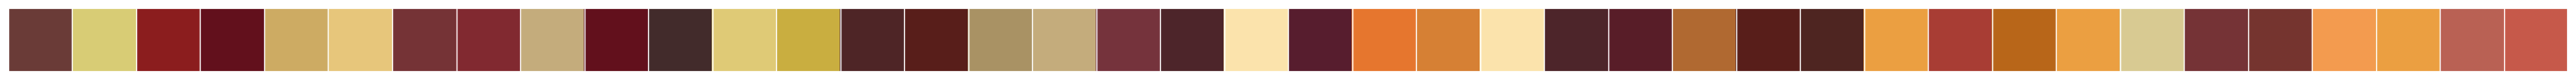

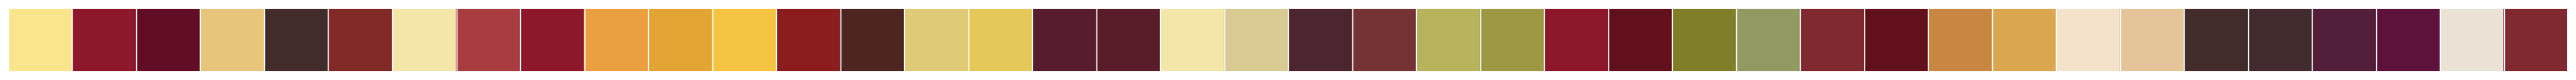

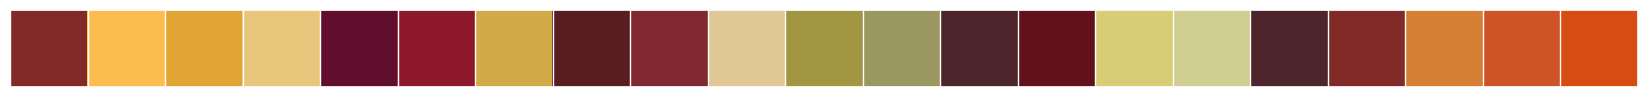

In [219]:
import seaborn as sns

sns.set_theme()

def hex_to_rgb(hex_value):
  h = hex_value.lstrip('#')
  return tuple(int(h[i:i + 2], 16) / 255.0 for i in (0, 2, 4))

all_skin_rgb = list(map(hex_to_rgb, all_skin_hexes))

row_size = 40
rows = [all_skin_rgb[i:i + row_size] for i in range(0, len(all_skin_rgb), row_size)]

for row in rows:
  sns.palplot(row)

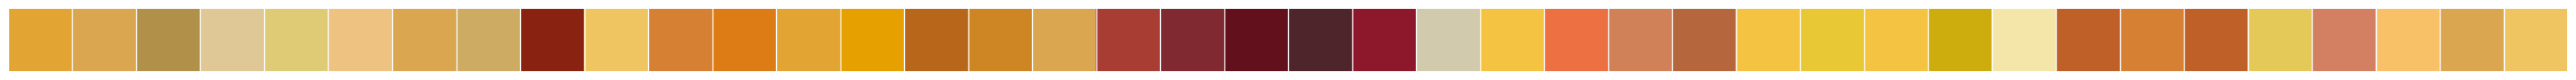

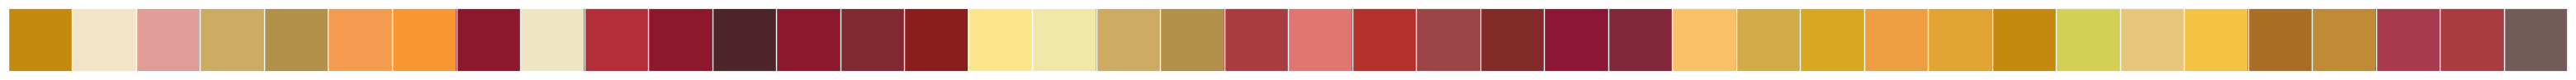

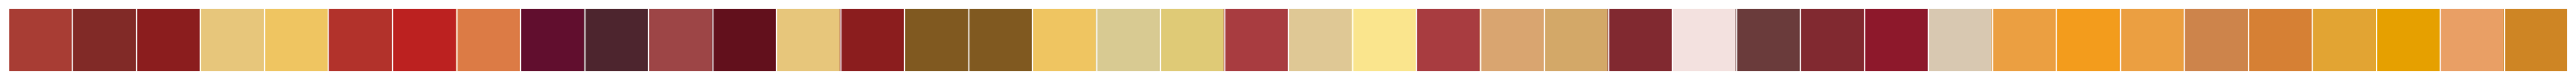

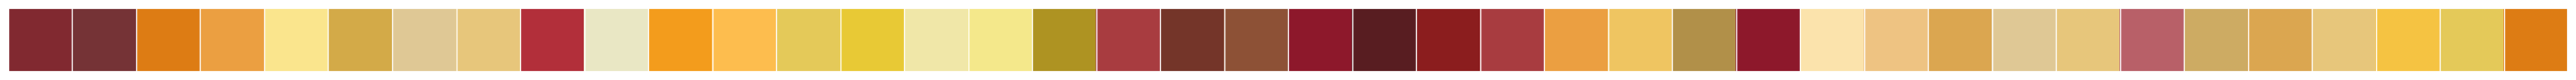

In [220]:
all_flesh_rgb = list(map(hex_to_rgb, all_flesh_hexes))

row_size = 40
rows = [all_flesh_rgb[i:i + row_size] for i in range(0, len(all_flesh_rgb), row_size)]

for row in rows:
  sns.palplot(row)